In [1]:
import numpy as np
from skimage.transform import (hough_line, hough_line_peaks, hough_circle, hough_circle_peaks)
from skimage.draw import circle_perimeter
from skimage.feature import canny
from skimage.data import astronaut
from skimage.io import imread, imsave
from skimage.color import rgb2gray, gray2rgb, label2rgb
from skimage import img_as_float
from skimage.morphology import skeletonize
from skimage import data, img_as_float
import matplotlib.pyplot as pylab
from matplotlib import cm
from skimage.filters import sobel, threshold_otsu
from skimage.feature import canny
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries, find_boundaries

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1524\366941294.py:19: RuntimeWarning: divide by zero encountered in scalar divide
  y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1524\366941294.py:20: RuntimeWarning: divide by zero encountered in scalar divide
  y1 = (dist - image.shape[1] * np.cos(angle)) / np.sin(angle)


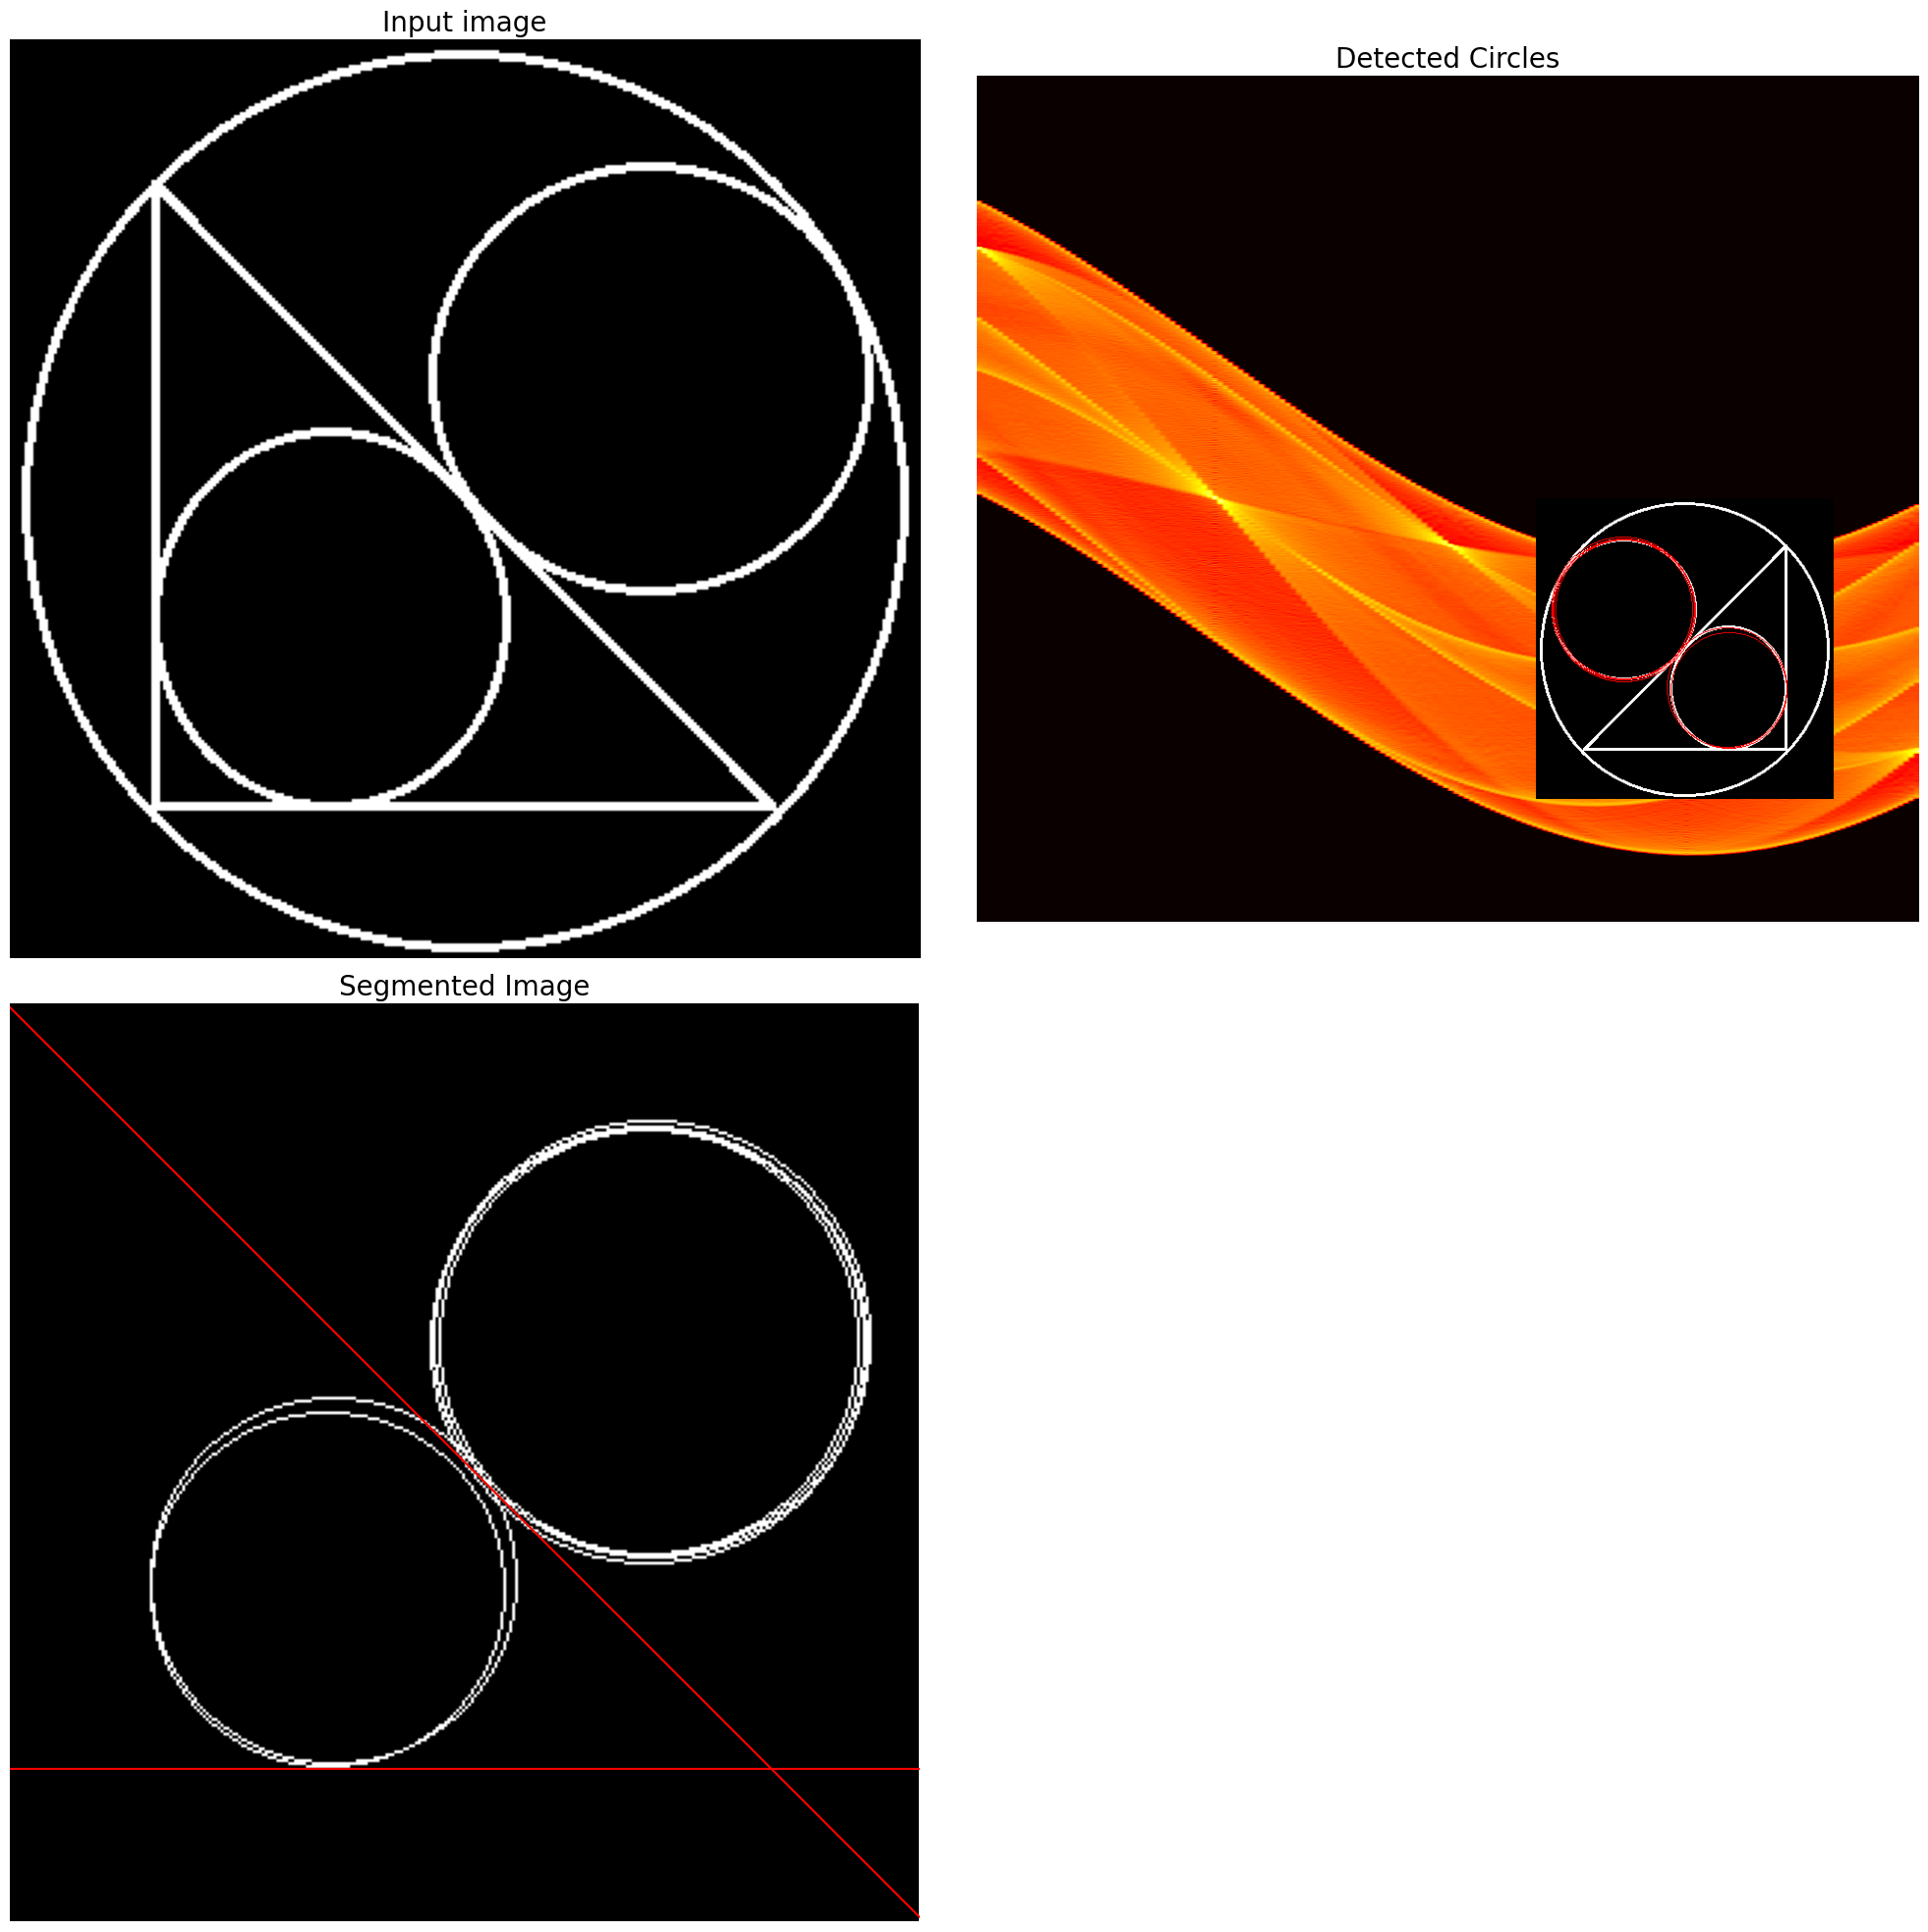

(None, (0.0, 1.0, 0.0, 1.0), None)

In [3]:
image = imread('D:/ĐH/Xử lý ảnh/BTL/images/triangle_circle.png')

# Check if the image has 4 channels (RGBA) and remove the alpha channel
if image.shape[2] == 4:
    image = image[:, :, :3]

# Now the image has 3 channels (RGB)
image = rgb2gray(image)
h, theta, d = hough_line(image)
fig, axes = pylab.subplots(2, 2, figsize=(20, 20))
axes = axes.ravel()
axes[0].imshow(image, cmap=cm.gray), axes[0].set_title('Input image', size=20), axes[0].set_axis_off()
axes[1].imshow(np.log(1 + h), extent=[10*np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]], cmap=cm.hot, aspect=1/1.5)
axes[1].set_title('Hough transform', size=20)
axes[1].set_xlabel('Angles (degrees)', size=20), axes[1].set_ylabel('Distance (pixels)', size=20)
axes[1].axis('image')
axes[2].imshow(image, cmap=cm.gray)
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - image.shape[1] * np.cos(angle)) / np.sin(angle)
    axes[2].plot((0, image.shape[1]), (y0, y1), '-r')
axes[2].set_xlim((0, image.shape[1])), axes[2].set_ylim((image.shape[0], 0))
axes[2].set_axis_off(), axes[2].set_title('Detected lines', size=20)
hough_radii = np.arange(50, 100, 2)
hough_res = hough_circle(image, hough_radii)
accums, c_x, c_y, radii = hough_circle_peaks(hough_res, hough_radii, total_num_peaks=6)
segmented_image = np.zeros_like(image)
image = gray2rgb(image)
for center_y, center_x, radius in zip(c_y, c_x, radii):
    circ_y, circ_x = circle_perimeter(center_y, center_x, radius)
    image[circ_y, circ_x] = (1, 0, 0)
    segmented_image[circ_y, circ_x] = 1
axes[1].imshow(image, cmap=pylab.cm.gray), axes[1].set_axis_off()
axes[1].set_title('Detected Circles', size=20)
axes[2].imshow(segmented_image, cmap=pylab.cm.gray), axes[2].set_axis_off()
axes[2].set_title('Segmented Image', size=20)
pylab.tight_layout(), pylab.axis('off'), pylab.show()


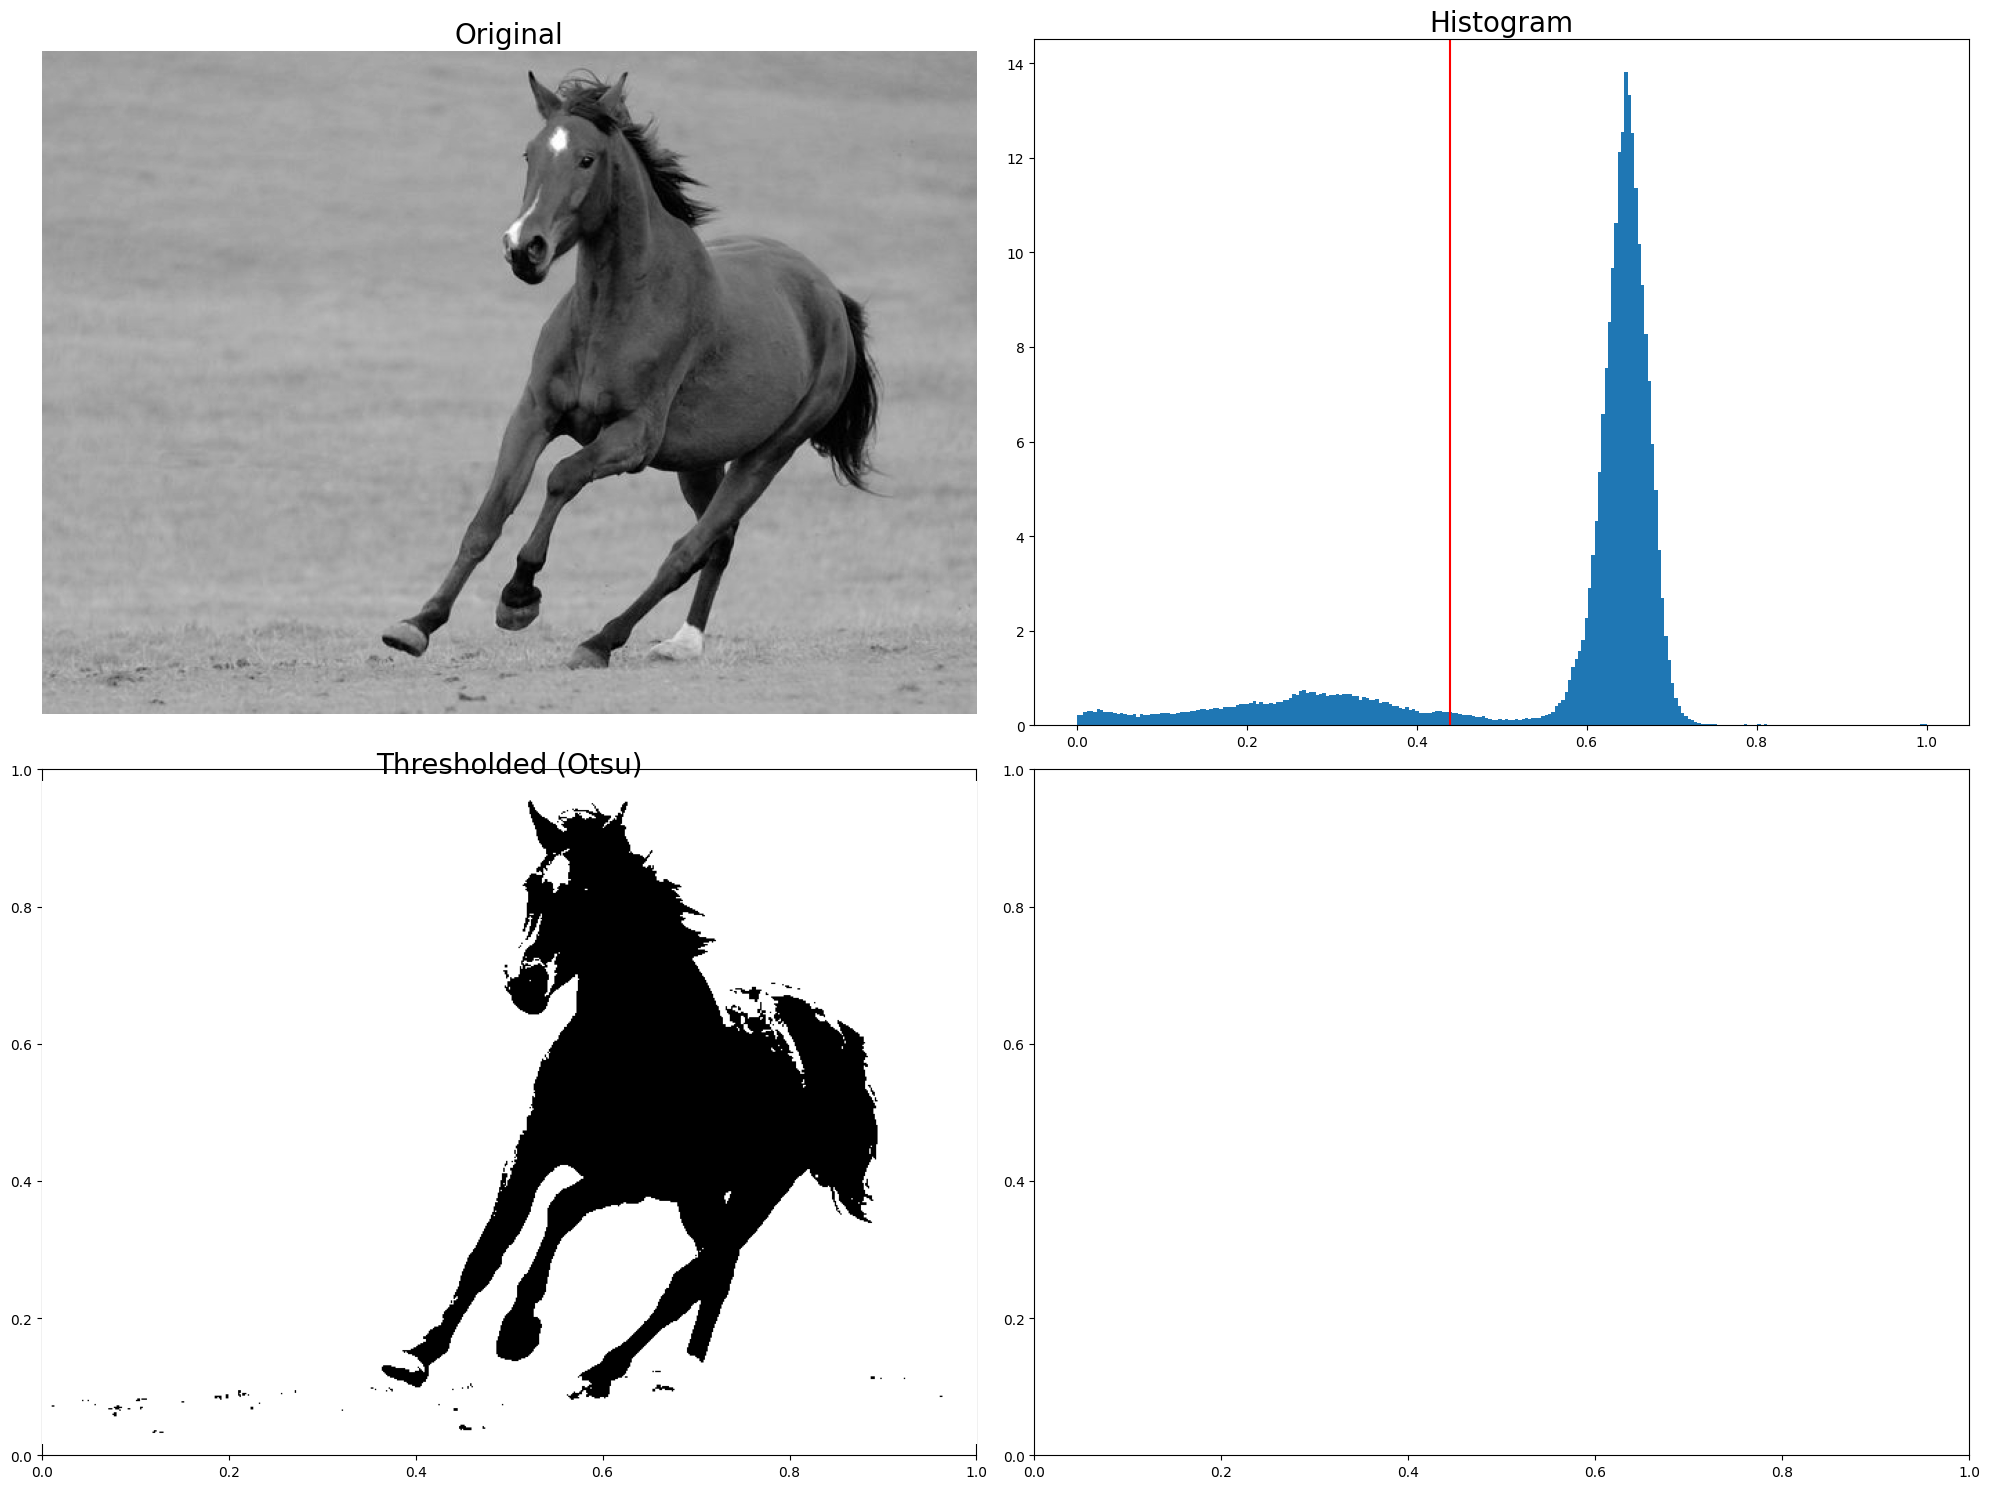

((-0.5, 676.5, 479.5, -0.5), None, None)

In [5]:
image = rgb2gray(imread('D:/ĐH/Xử lý ảnh/BTL/images/horse.jpg'))
thresh = threshold_otsu(image)
binary = image > thresh
fig, axes = pylab.subplots(nrows=2, ncols=2, figsize=(20, 15))
axes = axes.ravel()
axes[0], axes[1] = pylab.subplot(2, 2, 1), pylab.subplot(2, 2, 2)
axes[2] = pylab.subplot(2, 2, 3, sharex=axes[0], sharey=axes[0])
axes[3] = pylab.subplot(2, 2, 4, sharex=axes[0], sharey=axes[0])
axes[0].imshow(image, cmap=pylab.cm.gray)
axes[0].set_title('Original', size=20), axes[0].axis('off')
axes[1].hist(image.ravel(), bins=256, density=True)  # Thay 'normed' bằng 'density'
axes[1].set_title('Histogram', size=20), axes[1].axvline(thresh, color='r')
axes[2].imshow(binary, cmap=pylab.cm.gray)
axes[2].set_title('Thresholded (Otsu)', size=20), axes[2].axis('off')
axes[3].axis('off'), pylab.tight_layout(), pylab.show()

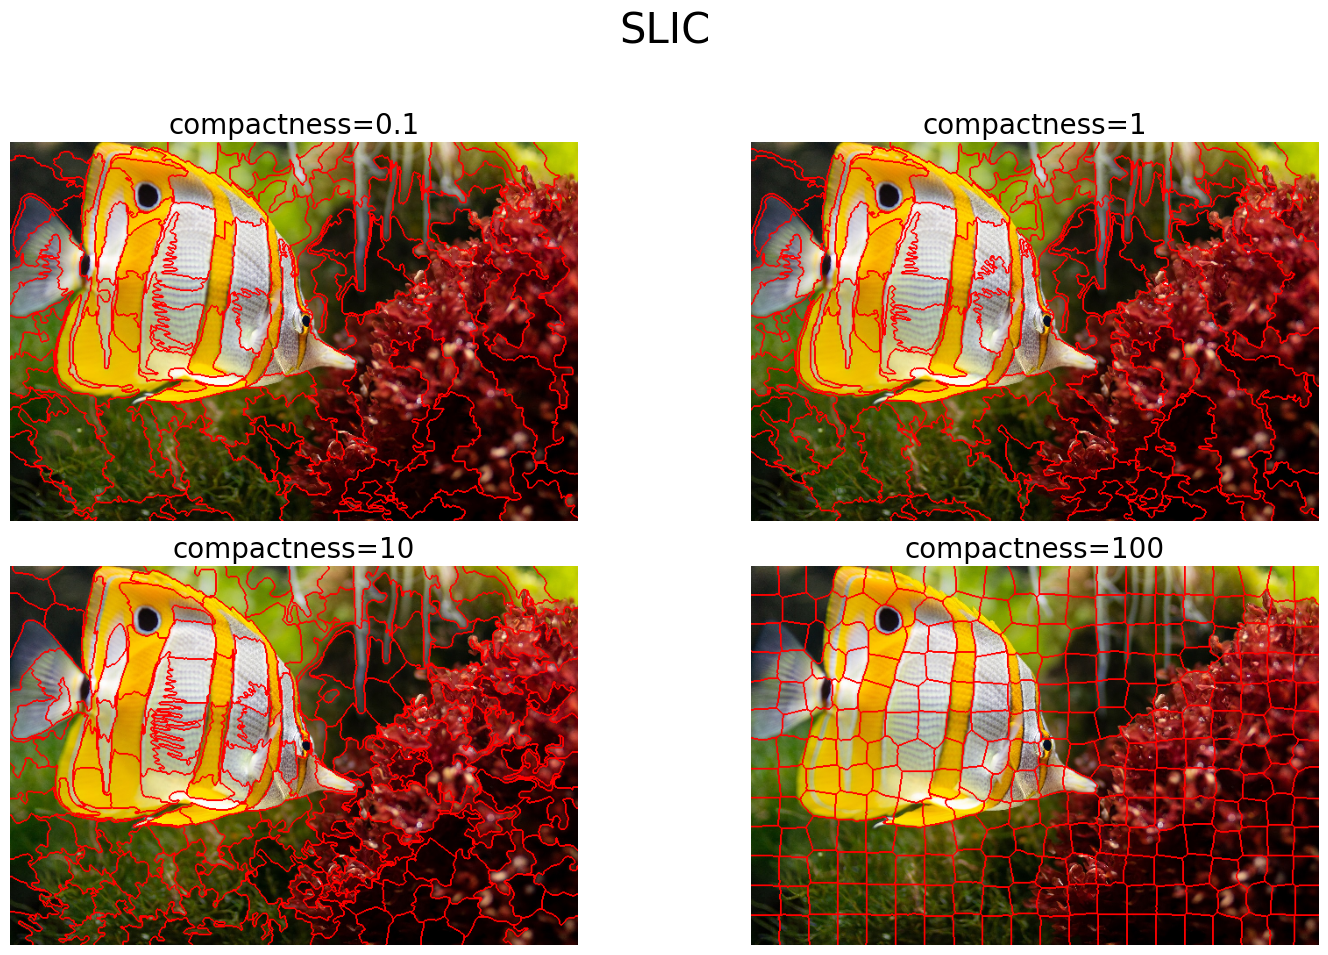

(Text(0.5, 0.98, 'SLIC'), None, None)

In [8]:
def plot_image(img, title):
    pylab.imshow(img), pylab.title(title, size=20), pylab.axis('off')
img = imread('D:/ĐH/Xử lý ảnh/BTL/images/fish.jpg')[::2, ::2, :3]
pylab.figure(figsize=(15,10))
i = 1
for compactness in [0.1, 1, 10, 100]:
    pylab.subplot(2,2,i)
    segments_slic = slic(img, n_segments=250, compactness=compactness, sigma=1)
    plot_image(mark_boundaries(img, segments_slic, color=(1,0,0)), 'compactness=' + str(compactness))
    i += 1
pylab.suptitle('SLIC', size=30), pylab.tight_layout(rect=[0, 0.03, 1, 0.95]), pylab.show()

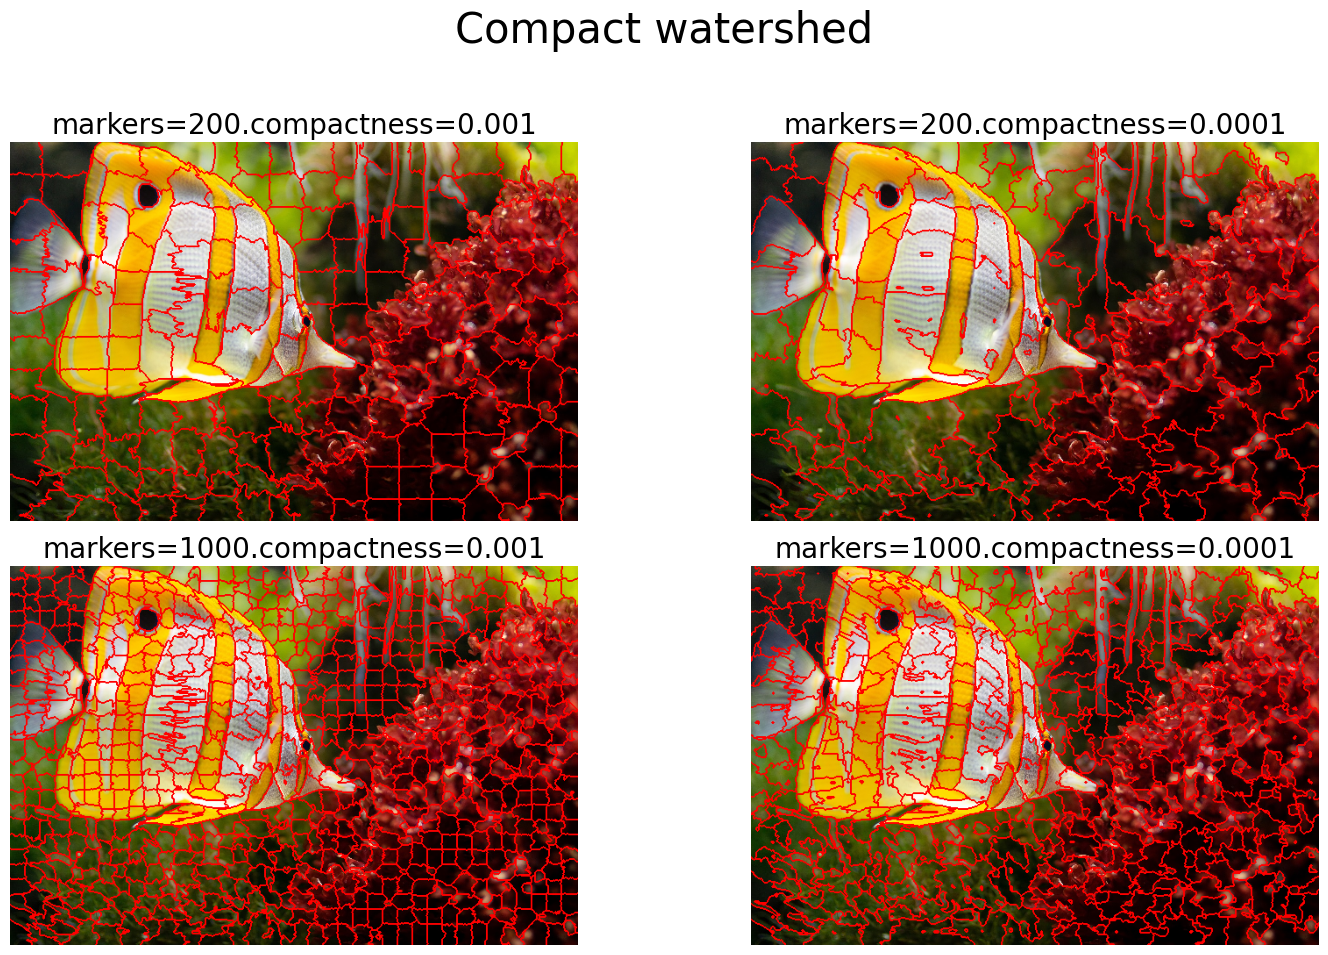

(Text(0.5, 0.98, 'Compact watershed'), None, None)

In [11]:
from skimage.segmentation import watershed
gradient = sobel(rgb2gray(img))
pylab.figure(figsize=(15,10))
i = 1
for markers in [200, 1000]:
    for compactness in [0.001, 0.0001]:
        pylab.subplot(2,2,i)
        segments_watershed = watershed(gradient, markers=markers, compactness=compactness)
        plot_image(mark_boundaries(img, segments_watershed, color=(1,0,0)), 'markers=' + str(markers) + '.compactness=' + str(compactness))
        i += 1
pylab.suptitle('Compact watershed', size=30), pylab.tight_layout(rect=[0, 0.03, 1, 0.95]), pylab.show()
